# Maximum Likelihood Estimator

This notebook is used to help to create tests for the `mle` module, which computes the maximum likelihood estimator (MLE) of the parameter. Usual methods like MCMC MLE is intractable since the likelihood is intractable. The functions proposed computes the MLE by maximizing the log ratio likelihood. For more details, read the README file.

In [1]:
import sys; sys.path.append('..')
import os
import random
import logging

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.optimize import root, minimize

from ergm import mle, sampling, dataset
from ergm.model import Model
from ergm.model import sufficient

seed = 1000
random.seed(seed)
np.random.seed(seed)

# Activate verbose mode
logger = logging.getLogger('ergm.mle')
logger.setLevel(logging.INFO)
logger_handler = logging.StreamHandler(stream=sys.stdout)
logger_handler.setLevel(logging.INFO)
logger.addHandler(logger_handler)

In [2]:
# Load the karate graph
karate_dir = os.path.join('..', 'data', 'karate')
karate_filename = 'out.ucidata-zachary'
karate_graph = dataset.get_karate_graph(karate_dir, karate_filename)

# Set variables for every experiences
nsample0 = 200
burnin = 1000
thinning = 100

def print_trace(trace, sample_ss):
    """Represents the trace of the maximum_likelihood_estimator function."""
    for i, (p, g, ss0, res) in enumerate(trace):
        print('Iteration', i)
        print('Parameter:', p)
        ss0_mean = ss0.mean(0)
        pseudo_observation = g * sample_ss + (1 - g) * ss0_mean
        plt.figure()
        plt.scatter(ss0[:, 0], ss0[:, 1], c='red')
        plt.scatter(sample_ss[0], sample_ss[1], c='blue')
        plt.scatter(pseudo_observation[0], pseudo_observation[1], c='green', marker='x')
        plt.xlabel('Sufficient statistic 1')
        plt.ylabel('Sufficient statistic 2')
        plt.legend(['Generated graphs', 
                    'Observed graph',
                    'Pseudo-observed graph'])
        plt.show()


def print_3d_trace(trace, sample_ss):
    """Represents the trace of the maximum_likelihood_estimator function."""
    for i, (p, g, ss0, res) in enumerate(trace):
        print('Iteration', i)
        print('Parameter:', p)
        ss0_mean = ss0.mean(0)
        pseudo_observation = g * sample_ss + (1 - g) * ss0_mean
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
        ax.scatter(ss0[:, 0], ss0[:, 1], ss0[:, 2], c='red')
        ax.scatter(sample_ss[0], sample_ss[1], sample_ss[2], c='blue')
        ax.scatter(pseudo_observation[0], pseudo_observation[1], pseudo_observation[2], c='green', marker='x')
        ax.set_xlabel('Sufficient statistic 1')
        ax.set_ylabel('Sufficient statistic 2')
        ax.set_zlabel('Sufficient statistic 3')
        ax.legend(['Generated graphs', 
                   'Observed graph',
                   'Pseudo-observed graph'])
        plt.show()

We will try different models. The first one is simply made of one sufficient statistics: the number of edges.

In [3]:
param_init = np.array([0, 0])
model = Model(
    [
        nx.Graph.number_of_edges,
        sufficient.geo_weighted_ew_shared_partners,
    ],
    [
        None,
        [0.2],
    ]
)
sample_ss = model.sufficient(karate_graph)

param0 = mle.pseudolikelihood_estimation(karate_graph, model)
print('Maximum pseudolikelihood estimator:', param0)
param_mle, trace = mle.maximum_likelihood_estimator(karate_graph, model, param0, nsample0, burnin, thinning,
                                                    keep_trace=True)
print('Maximum likelihood estimator:', param_mle)

The function pseudolikelihood_estimation is called.
Maximum pseudolikelihood estimator: [-1.33009581  0.58679716]
The function maximum_likelihood_estimator is called.
Start iterating
Parameter: [-1.33009581  0.58679716]
Parameter: [-1.43009581  0.48679716]
Parameter: [-1.53009581  0.38679716]
Parameter: [-1.63009581  0.37683617]
Parameter: [-1.73009581  0.32930985]
Parameter: [-1.83009581  0.30464115]
Parameter: [-1.93009581  0.3092318 ]
Parameter: [-2.03009581  0.33221887]
Parameter: [-2.13009581  0.35258074]
Parameter: [-2.23009581  0.38277656]
Parameter: [-2.33009581  0.45865935]
Parameter: [-2.43009581  0.53389753]
Parameter: [-2.53009581  0.5764576 ]
Parameter: [-2.63009581  0.6348216 ]
Parameter: [-2.73009581  0.69143744]
Parameter: [-2.83009581  0.79143386]
Final iteration
Maximum likelihood estimator: [-3.28116136  1.0861681 ]


Iteration 0
Parameter: [-1.33009581  0.58679716]


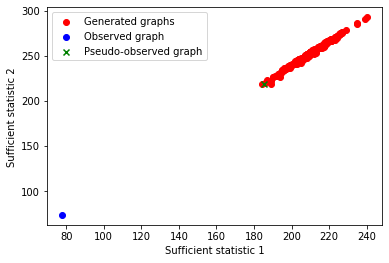

Iteration 1
Parameter: [-1.43009581  0.48679716]


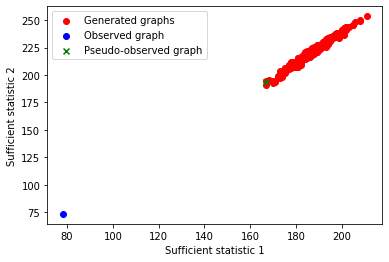

Iteration 2
Parameter: [-1.53009581  0.38679716]


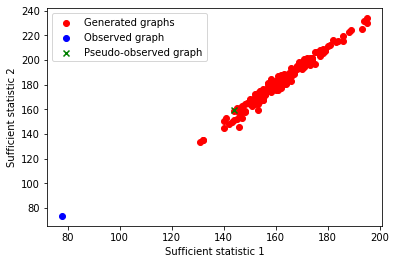

Iteration 3
Parameter: [-1.63009581  0.37683617]


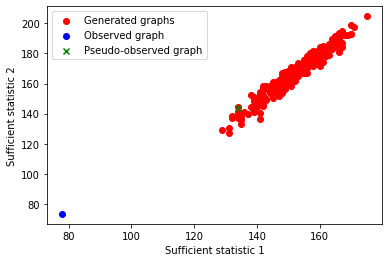

Iteration 4
Parameter: [-1.73009581  0.32930985]


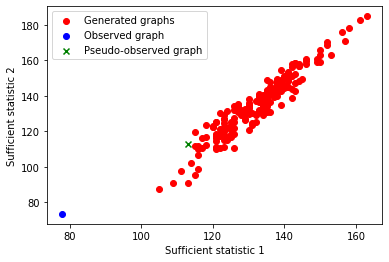

Iteration 5
Parameter: [-1.83009581  0.30464115]


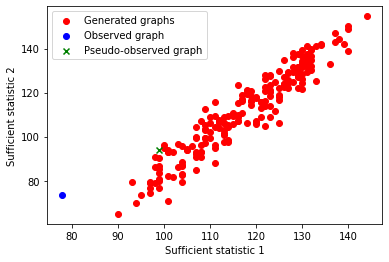

Iteration 6
Parameter: [-1.93009581  0.3092318 ]


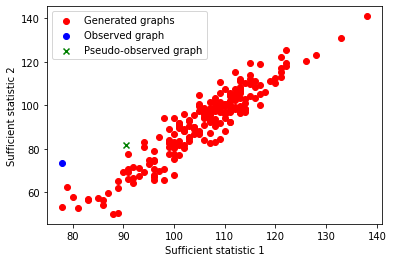

Iteration 7
Parameter: [-2.03009581  0.33221887]


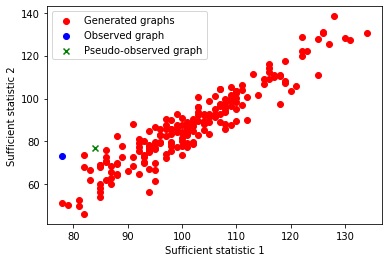

Iteration 8
Parameter: [-2.13009581  0.35258074]


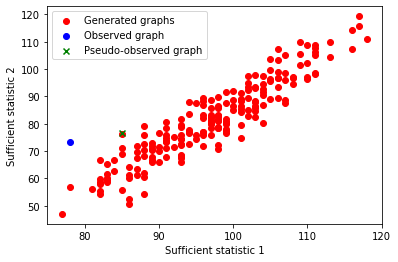

Iteration 9
Parameter: [-2.23009581  0.38277656]


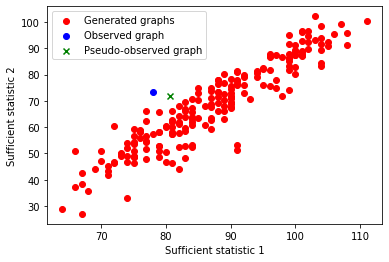

Iteration 10
Parameter: [-2.33009581  0.45865935]


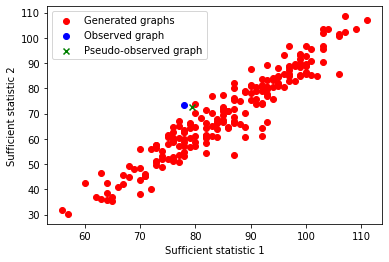

Iteration 11
Parameter: [-2.43009581  0.53389753]


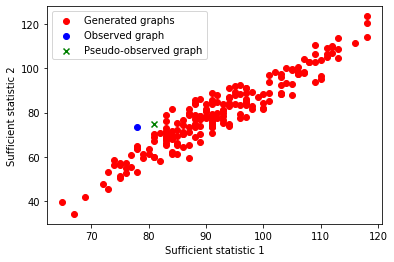

Iteration 12
Parameter: [-2.53009581  0.5764576 ]


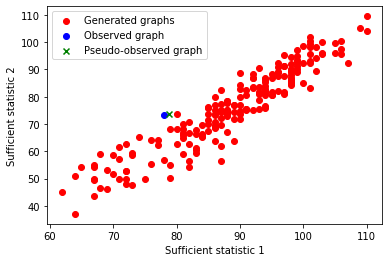

Iteration 13
Parameter: [-2.63009581  0.6348216 ]


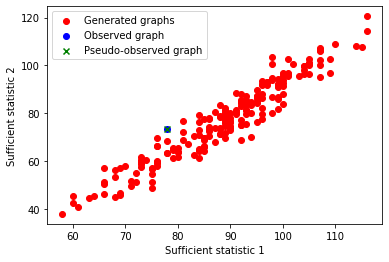

Iteration 14
Parameter: [-2.73009581  0.69143744]


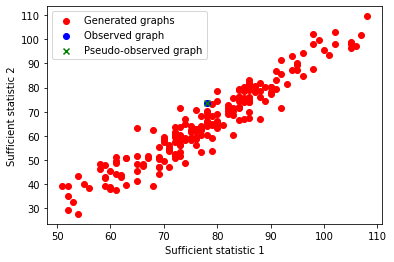

Iteration 15
Parameter: [-2.83009581  0.79143386]


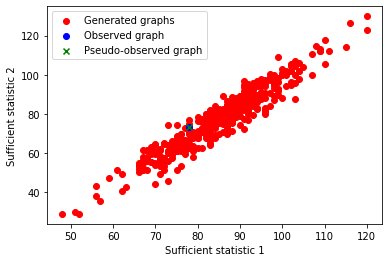

In [4]:
print_trace(trace, sample_ss)

In [5]:
param_init = np.array([0, 0])
model = Model(
    [
        nx.Graph.number_of_edges,
        sufficient.geo_weighted_degree,
    ],
    [
        None,
        [0.8],
    ]
)
sample_ss = model.sufficient(karate_graph)

param0 = mle.pseudolikelihood_estimation(karate_graph, model)
print('Maximum pseudolikelihood estimator:', param0)
param_mle, trace = mle.maximum_likelihood_estimator(karate_graph, model, param0, nsample0, burnin, thinning,
                                                    keep_trace=True)
print('Maximum likelihood estimator:', param_mle)

The function pseudolikelihood_estimation is called.
Maximum pseudolikelihood estimator: [-0.70695044 -1.21408274]
The function maximum_likelihood_estimator is called.
Start iterating
Parameter: [-0.70695044 -1.21408274]
Parameter: [-0.7370813  -1.31408274]
Parameter: [-0.8370813  -1.41408274]
Parameter: [-0.87360445 -1.51408274]
Parameter: [-0.97360445 -1.61408274]
Parameter: [-1.07360445 -1.71408274]
Parameter: [-1.17360445 -1.81408274]
Parameter: [-1.27360445 -1.91408274]
Parameter: [-1.28719082 -1.81574241]
Parameter: [-1.27302996 -1.71574241]
Final iteration
Maximum likelihood estimator: [-1.3866778  -1.50933397]


Iteration 0
Parameter: [-0.70695044 -1.21408274]


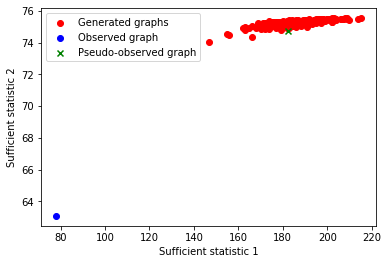

Iteration 1
Parameter: [-0.7370813  -1.31408274]


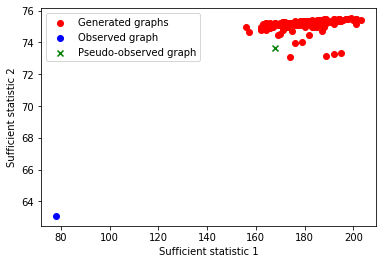

Iteration 2
Parameter: [-0.8370813  -1.41408274]


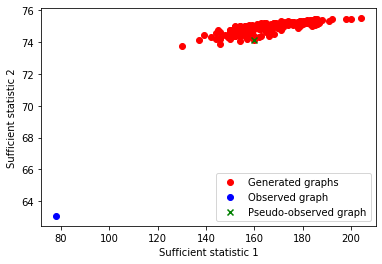

Iteration 3
Parameter: [-0.87360445 -1.51408274]


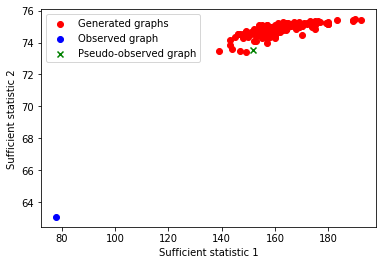

Iteration 4
Parameter: [-0.97360445 -1.61408274]


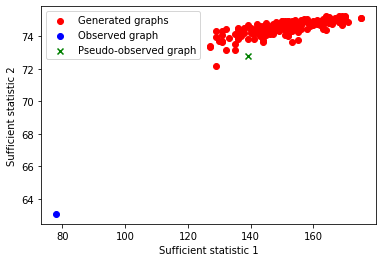

Iteration 5
Parameter: [-1.07360445 -1.71408274]


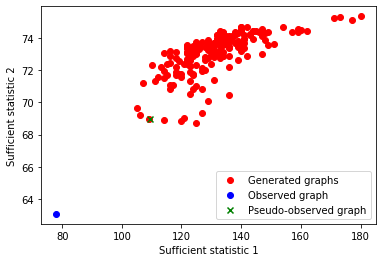

Iteration 6
Parameter: [-1.17360445 -1.81408274]


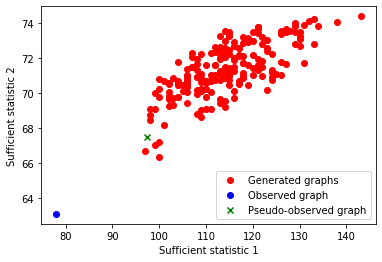

Iteration 7
Parameter: [-1.27360445 -1.91408274]


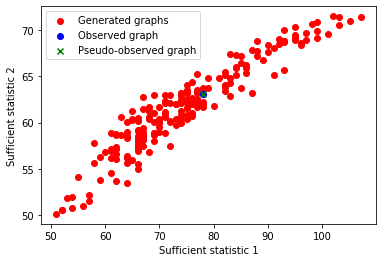

Iteration 8
Parameter: [-1.28719082 -1.81574241]


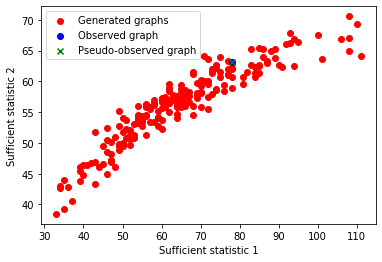

Iteration 9
Parameter: [-1.27302996 -1.71574241]


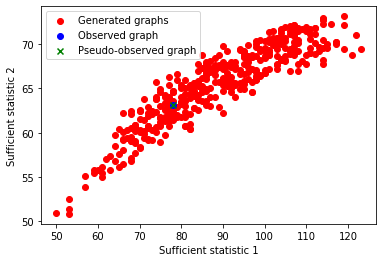

In [6]:
print_trace(trace, sample_ss)

In [7]:
param_init = np.array([0, 0, 0])
model = Model(
    [
        nx.Graph.number_of_edges,
        sufficient.geo_weighted_ew_shared_partners,
        sufficient.geo_weighted_degree,
    ],
    [
        None,
        [0.2],
        [0.8],
    ]
)
sample_ss = model.sufficient(karate_graph)

param0 = mle.pseudolikelihood_estimation(karate_graph, model)
print('Maximum pseudolikelihood estimator:', param0)
param_mle, trace = mle.maximum_likelihood_estimator(karate_graph, model, param0, nsample0, burnin, thinning,
                                                    keep_trace=True)
print('Maximum likelihood estimator:', param_mle)

The function pseudolikelihood_estimation is called.
Maximum pseudolikelihood estimator: [-1.29968697  0.58071545 -0.15201992]
The function maximum_likelihood_estimator is called.
Start iterating
Parameter: [-1.29968697  0.58071545 -0.15201992]
Parameter: [-1.28587593  0.55728183 -0.25201992]
Parameter: [-1.32915938  0.55626931 -0.35201992]
Parameter: [-1.42915938  0.5915105  -0.45201992]
Parameter: [-1.50581899  0.60695563 -0.55201992]
Parameter: [-1.58308848  0.64251046 -0.65201992]
Parameter: [-1.6520711   0.67060106 -0.75201992]
Parameter: [-1.7520711   0.70747346 -0.85201992]
Parameter: [-1.8520711   0.70628133 -0.95201992]
Parameter: [-1.9520711   0.65345006 -1.05201992]
Parameter: [-2.0520711   0.60462398 -1.15201992]
Parameter: [-2.1520711   0.61003079 -1.25201992]
Parameter: [-2.2520711   0.64290163 -1.15201992]
Parameter: [-2.3520711   0.61981134 -1.05201992]
Parameter: [-2.42913993  0.71981134 -0.95201992]
Parameter: [-2.52913993  0.65738241 -1.05201992]
Parameter: [-2.450223

Iteration 0
Parameter: [-1.29968697  0.58071545 -0.15201992]


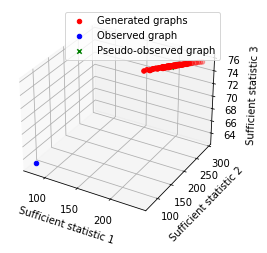

Iteration 1
Parameter: [-1.28587593  0.55728183 -0.25201992]


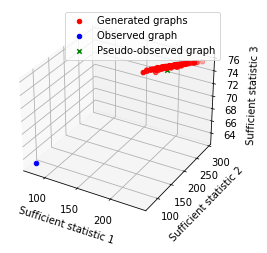

Iteration 2
Parameter: [-1.32915938  0.55626931 -0.35201992]


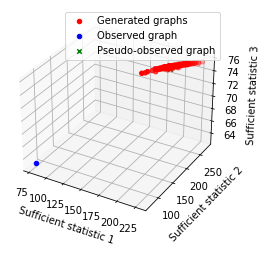

Iteration 3
Parameter: [-1.42915938  0.5915105  -0.45201992]


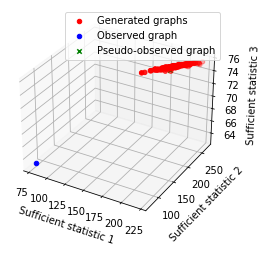

Iteration 4
Parameter: [-1.50581899  0.60695563 -0.55201992]


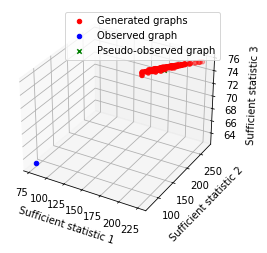

Iteration 5
Parameter: [-1.58308848  0.64251046 -0.65201992]


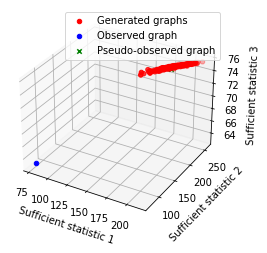

Iteration 6
Parameter: [-1.6520711   0.67060106 -0.75201992]


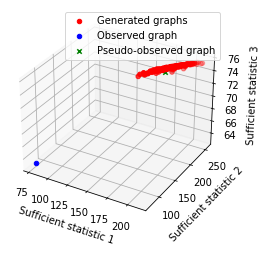

Iteration 7
Parameter: [-1.7520711   0.70747346 -0.85201992]


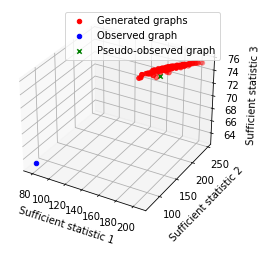

Iteration 8
Parameter: [-1.8520711   0.70628133 -0.95201992]


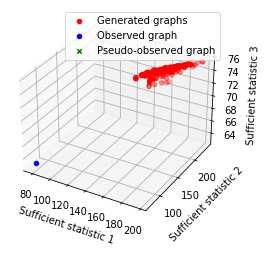

Iteration 9
Parameter: [-1.9520711   0.65345006 -1.05201992]


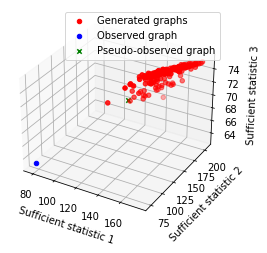

Iteration 10
Parameter: [-2.0520711   0.60462398 -1.15201992]


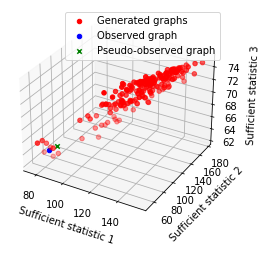

Iteration 11
Parameter: [-2.1520711   0.61003079 -1.25201992]


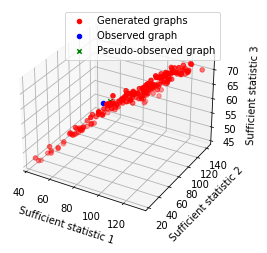

Iteration 12
Parameter: [-2.2520711   0.64290163 -1.15201992]


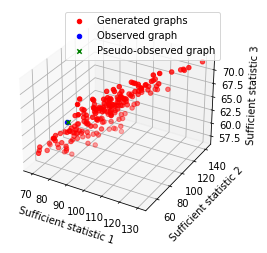

Iteration 13
Parameter: [-2.3520711   0.61981134 -1.05201992]


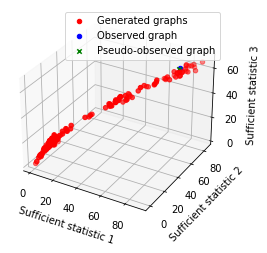

Iteration 14
Parameter: [-2.42913993  0.71981134 -0.95201992]


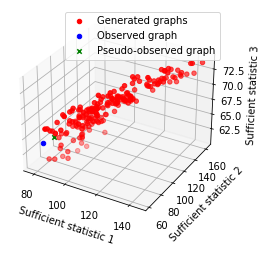

Iteration 15
Parameter: [-2.52913993  0.65738241 -1.05201992]


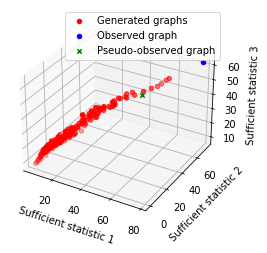

Iteration 16
Parameter: [-2.45022341  0.75738241 -1.15201992]


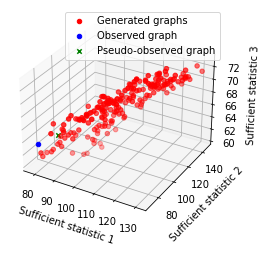

Iteration 17
Parameter: [-2.55022341  0.69126875 -1.17035936]


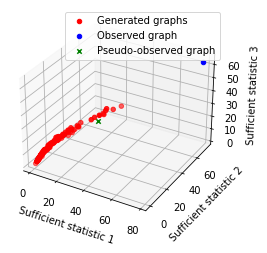

Iteration 18
Parameter: [-2.45022341  0.79126875 -1.24328115]


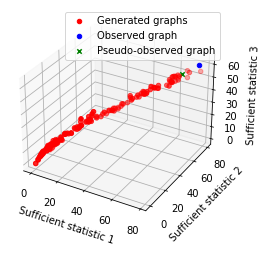

Iteration 19
Parameter: [-2.35022341  0.83090825 -1.14328115]


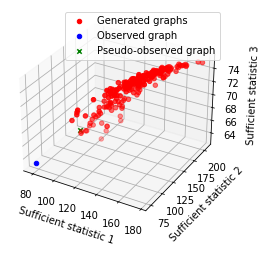

Iteration 20
Parameter: [-2.45022341  0.73397285 -1.24328115]


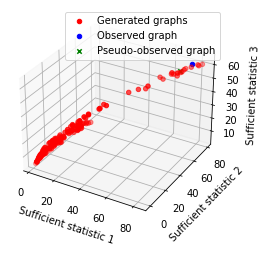

Iteration 21
Parameter: [-2.5228982   0.83397285 -1.14328115]


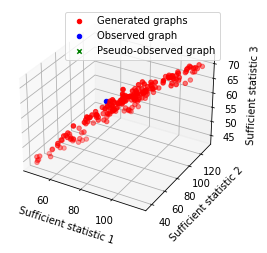

Iteration 22
Parameter: [-2.60842203  0.85515036 -1.04328115]


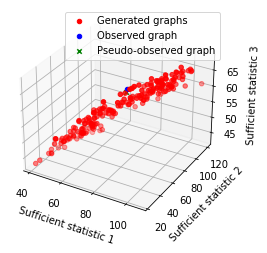

Iteration 23
Parameter: [-2.54821553  0.78815975 -0.94328115]


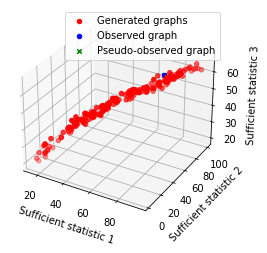

Iteration 24
Parameter: [-2.56408045  0.82427008 -0.84328115]


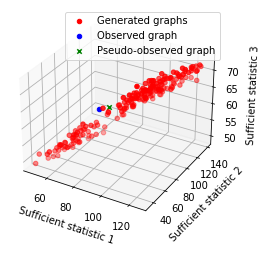

Iteration 25
Parameter: [-2.62311377  0.82731588 -0.74328115]


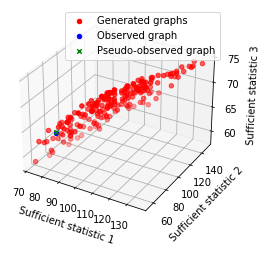

Iteration 26
Parameter: [-2.72311377  0.79736653 -0.79379488]


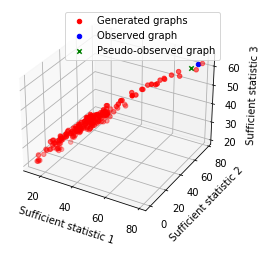

Iteration 27
Parameter: [-2.67963798  0.89736653 -0.69379488]


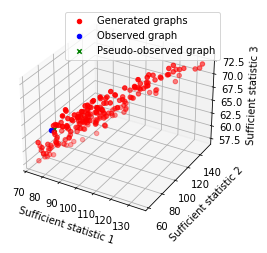

Iteration 28
Parameter: [-2.77963798  0.82421603 -0.59379488]


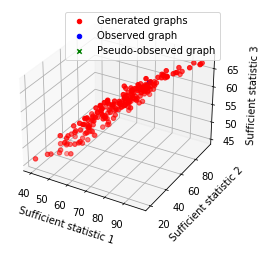

Iteration 29
Parameter: [-2.86448543  0.92421603 -0.49379488]


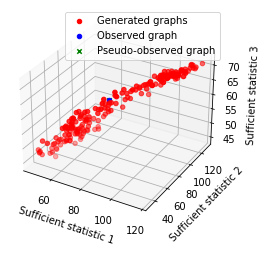

Iteration 30
Parameter: [-2.94708857  0.95553461 -0.39379488]


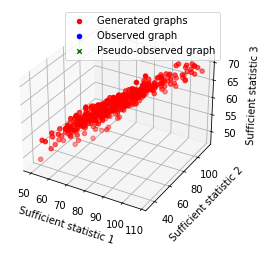

In [8]:
print_3d_trace(trace, sample_ss)